In [122]:
import pandas as pd
import rdkit.Chem as Chem

In [123]:
df_rdkit=pd.read_csv(r'./flav/flavone_clean_60K_smi_208f.csv')
df_rdkit.shape

(60250, 209)

In [124]:
df_smi=df_rdkit.SMILES
df_rdkit=df_rdkit.drop(columns="SMILES")

In [125]:
import Chemfunctions as chemfun

In [126]:
print(f'Shape of the df_rdkit before cleaning: {df_rdkit.shape}')
df_rdkit=chemfun.remove_nan_columns(df=df_rdkit)
df_rdkit=chemfun.remove_duplicate_columns(df=df_rdkit)
df_rdkit=chemfun.remove_columns_uniquevalues(df=df_rdkit)
df_rdkit=chemfun.remove_columns_low_std(df=df_rdkit)
df_rdkit=chemfun.remove_corr_features(df=df_rdkit,corr_cutoff=0.8)
print(f'Shape of the df_rdkit after cleaning: {df_rdkit.shape}')

Shape of the df_rdkit before cleaning: (60250, 208)
Removed 0 columns with nan
Removed 0 duplicate columns
Removed 89 columns values with a unique value
Removed 24 columns with std < 0.3 
Dropped 45 features with correlation coeff. > 0.80
Shape of the df_rdkit after cleaning: (60250, 50)


In [127]:
df_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MolWt,BCUT2D_MWHI,BCUT2D_LOGPHI,HallKierAlpha,Ipc,Kappa1,Kappa2,PEOE_VSA1,...,VSA_EState5,VSA_EState6,VSA_EState7,MolLogP,fr_alkyl_halide,fr_aryl_methyl,fr_ketone,fr_para_hydroxylation,fr_sulfide,fr_sulfone
0,14.240930,-6.332079,370.470,10.791089,7.309431e-17,-2.40,2.764450e+09,5.320041,7.076872,4.417151,...,-5.826523,-10.829230,-4.311276,4.76710,0,0,0,1,0,1
1,13.024943,-5.772429,331.305,13.387136,7.226441e-01,-3.00,5.748427e+06,7.513007,5.325260,4.417151,...,-1.318305,-8.756149,0.000000,2.42540,0,0,0,1,0,0
2,13.155520,-3.362113,278.307,11.343451,3.575828e-01,-2.68,1.663926e+07,4.665806,5.017990,4.417151,...,-2.704817,-7.996004,0.000000,3.97102,0,0,1,0,0,0
3,14.821051,-5.921292,391.332,13.724760,7.910403e-01,-3.40,4.360786e+07,9.511059,6.396816,4.417151,...,-5.756810,-8.936574,-4.095283,2.41950,0,0,0,0,0,1
4,13.015239,-5.418128,300.335,12.205981,5.929443e-01,-2.40,7.516008e+06,5.421295,4.856850,4.417151,...,-0.909850,-8.693373,-3.758026,2.86350,0,0,0,0,0,1


In [128]:
df_rdkit.insert(0,"SMILES",df_smi.to_list())

In [129]:
# df_rdkit.to_csv(r'./flavone_clean_60K_smi_50f.csv',index=False)

# Scaling

In [130]:
X_train=chemfun.do_scaling(xtrain=df_rdkit.drop(columns="SMILES"))

test data is not provided, returning only scaled train data


# pca

No. of PC           Cumulative variance                                                             
--------------------------------------------------
1                   0.161169                                                                        
2                   0.291924                                                                        
3                   0.380954                                                                        
4                   0.447597                                                                        
5                   0.508854                                                                        
6                   0.558483                                                                        
7                   0.602910                                                                        
8                   0.642280                                                                        
9                   0.674767            

C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


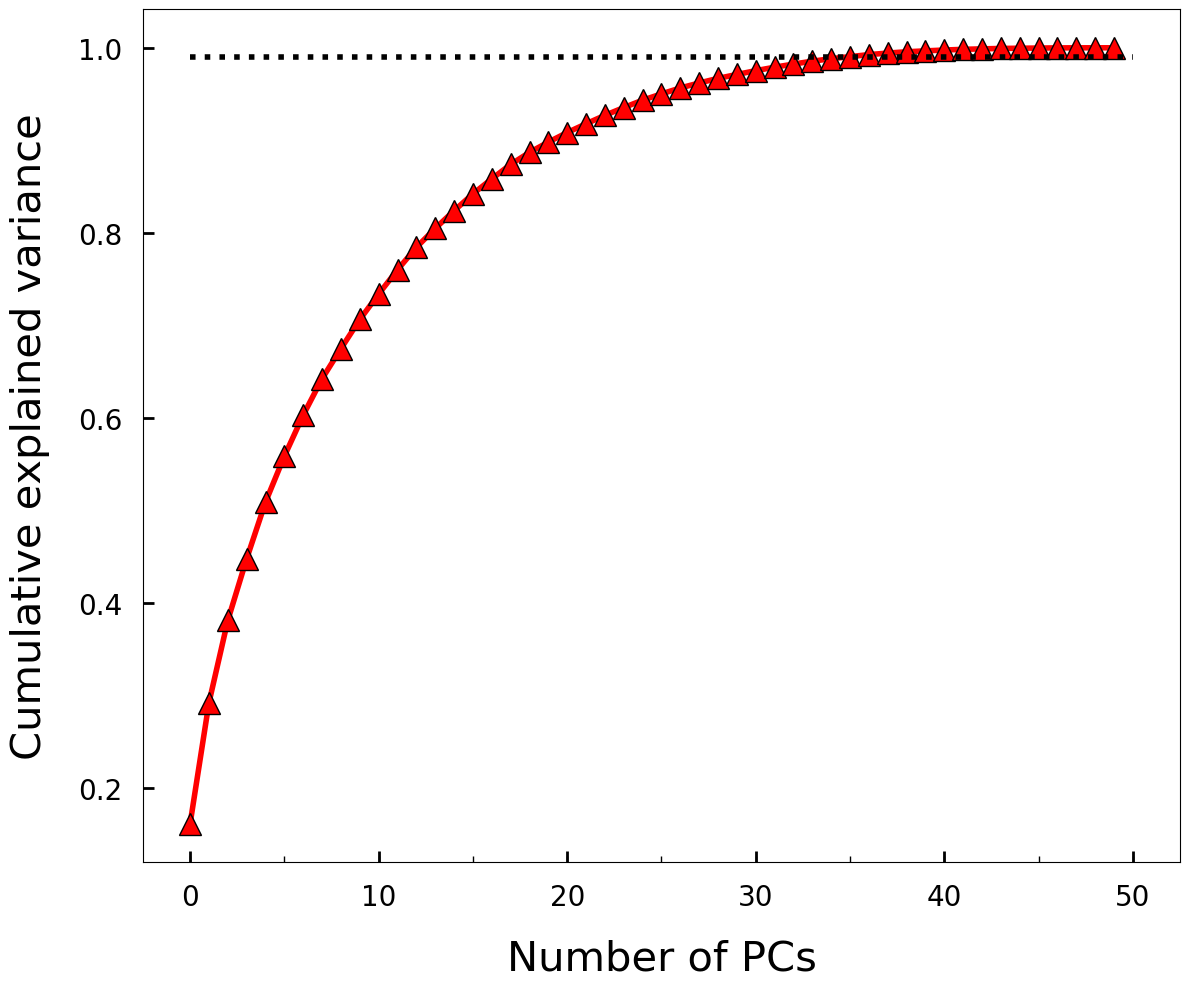

In [132]:
from sklearn.decomposition import PCA # Principle component analysis
import matplotlib.pyplot as plt  
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
pca = PCA().fit(X_train)

#Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of PCs', fontsize=30,labelpad=20)
ax1.set_ylabel('Cumulative explained variance', fontsize=30,labelpad=20)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', which='major', direction='in', size=8, left='on', bottom='on', width=2, pad=15)
ax1.tick_params(axis='both', which='minor', direction='in', size=4, left='on', bottom='on',width=1, pad=15)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(axis="x", labelsize=20)

plt.gcf().set_size_inches((12, 10))
evr = np.cumsum(pca.explained_variance_ratio_)
ax1.plot(evr, marker='^',markersize=16, markeredgecolor='black', 
         linestyle='-',linewidth=4, color='red')   # Plotting
ax1.plot([0, X_train.shape[1]],[0.99, 0.99],linestyle=':',linewidth=4, color='black')
plt.tight_layout()
# plt.savefig("./Figures/Xdata_reduced_pca.png",dpi=300)
print('{:<20s}{:<80s}'.format('No. of PC','Cumulative variance'))
print(50*'-')
for i,a in enumerate(evr):
    if a<=1:
        print('{:<20d}{:<80f}'.format(i+1,a))

In [138]:
n_PC = 36 # Set number of principle components
pca = PCA(n_components=n_PC)
Xdata = pca.fit_transform(X_train)  # Transform feature vectors to PCs

In [141]:
col_txt=["PC"+str(i+1) for i in np.arange(n_PC)]
df_xdata=pd.DataFrame(Xdata,columns=col_txt)
df_xdata.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,1.422792,-2.955321,0.013155,0.509031,-0.612744,-1.128036,-0.499126,-0.357280,1.135424,-0.081900,...,0.413675,0.030032,0.134866,-0.966801,-0.178188,0.054612,0.593428,-0.247385,0.147428,-0.085647
1,-3.084891,2.353415,1.375096,1.555980,-0.952408,-0.987871,0.049768,1.644736,0.639532,2.516286,...,0.217768,0.203039,0.534635,0.079040,-0.887736,-0.668578,-0.640540,0.083389,-0.422509,-0.033033
2,1.956362,2.602328,2.777315,0.836726,-1.336195,-0.339287,-2.934989,0.156733,-0.737406,0.561763,...,0.067966,0.072687,-0.027150,0.362912,-0.220747,-0.101326,-0.554475,-0.297415,0.193001,-0.310915
3,-3.901059,1.796804,-2.047562,-0.213093,0.078974,0.094305,-2.312816,0.524466,1.265391,-0.036192,...,-0.213359,0.185694,-0.156651,-0.328134,-0.721861,0.898323,0.515419,-0.208324,-0.064347,-0.025448
4,-1.068442,-0.715728,2.837976,2.127143,-1.878042,-0.790759,-2.094372,0.346695,0.375171,0.411170,...,-0.254873,0.903308,-0.011227,-0.066949,-0.315463,-0.112612,-0.514383,-0.273892,-0.012437,-0.628765


In [142]:
df_xdata.insert(0,"SMILES",df_rdkit.SMILES)
df_xdata.to_csv(r'./flav/flavone_clean_60K_smi_pcs.csv',index=False)